In [1]:
# Import packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import shapiro, kstest, probplot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

### Load Data

In [2]:
# Open dataset
df_irrigation = pd.read_csv('./datasets/irrigation_data.csv')

In [3]:
# Check Dataset structure
df_irrigation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Irrigation Hours         299 non-null    int64  
 1   Irrigation Area          299 non-null    int64  
 2   Irrigated Area by Angle  299 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 7.1 KB


In [4]:
# Show DF top
df_irrigation.head(10)

,Irrigation Hours,Irrigation Area,Irrigated Area by Angle
0,1,100,66.666667
1,2,200,133.333333
2,3,300,200.000000
3,4,400,266.666667
4,5,500,333.333333
5,6,600,400.000000
6,7,700,466.666667
7,8,800,533.333333
8,9,900,600.000000
9,10,1000,666.666667


In [5]:
# Show DF bottom
df_irrigation.tail(10)

,Irrigation Hours,Irrigation Area,Irrigated Area by Angle
289,290,29000,19333.333333
290,291,29100,19400.000000
291,292,29200,19466.666667
292,293,29300,19533.333333
293,294,29400,19600.000000
294,295,29500,19666.666667
295,296,29600,19733.333333
296,297,29700,19800.000000
297,298,29800,19866.666667
298,299,29900,19933.333333


### EDA

In [6]:
# Show DF statistics
df_irrigation.describe()

,Irrigation Hours,Irrigation Area,Irrigated Area by Angle
count,299.000000,299.000000,299.000000
mean,150.000000,15000.000000,10000.000000
std,86.458082,8645.808233,5763.872155
min,1.000000,100.000000,66.666667
25%,75.500000,7550.000000,5033.333333
50%,150.000000,15000.000000,10000.000000
75%,224.500000,22450.000000,14966.666667
max,299.000000,29900.000000,19933.333333


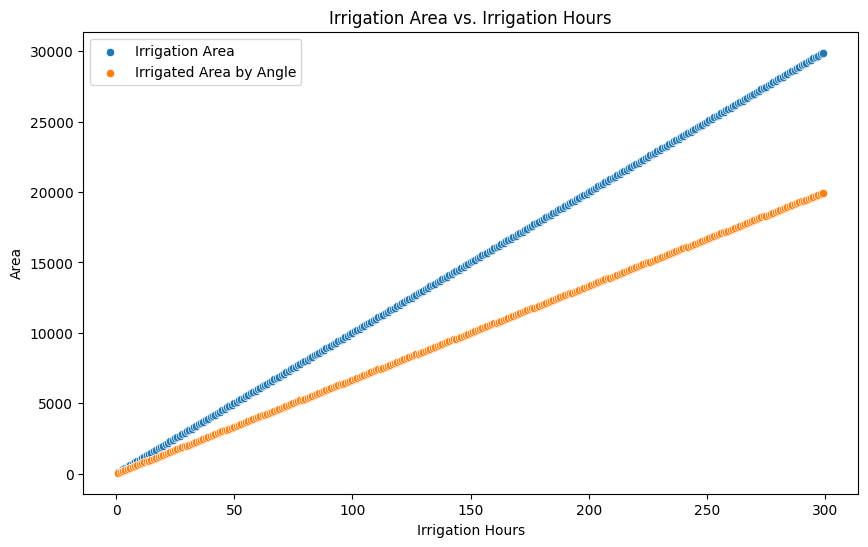

In [7]:
# Dispersal Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Irrigation Hours", y="Irrigation Area", data=df_irrigation, label="Irrigation Area")
sns.scatterplot(x="Irrigation Hours", y="Irrigated Area by Angle", data=df_irrigation, label="Irrigated Area by Angle")
plt.title("Irrigation Area vs. Irrigation Hours")
plt.xlabel("Irrigation Hours")
plt.ylabel("Area")
plt.legend()
plt.show()

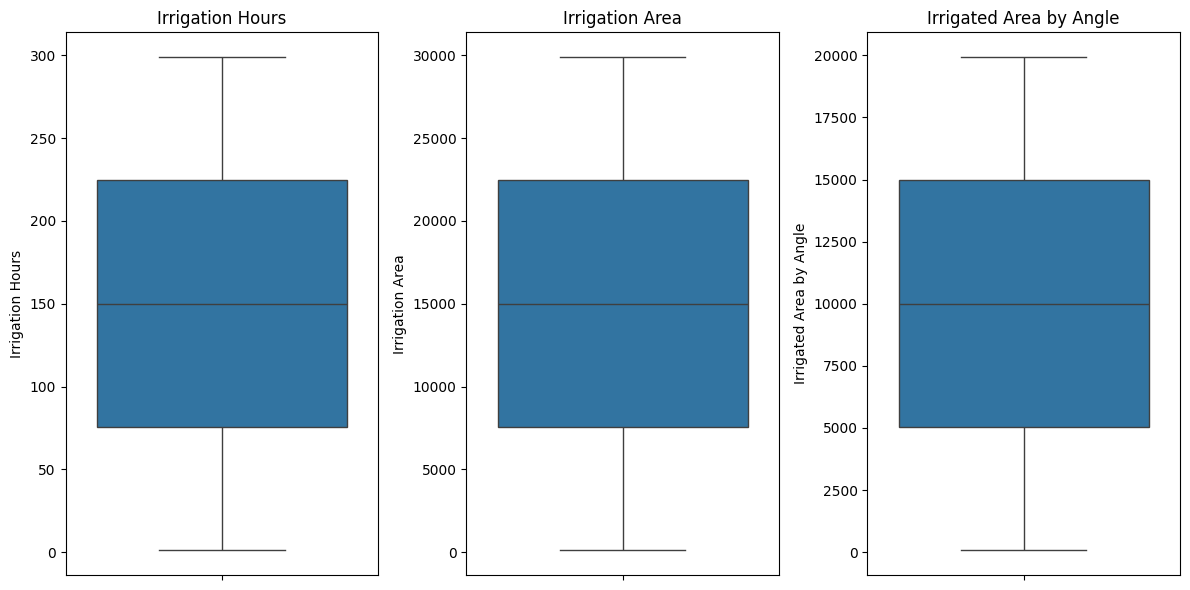

In [11]:
# Verify if we have outliers
# BoxPlot
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.boxplot(y='Irrigation Hours', data=df_irrigation)
plt.title('Irrigation Hours')

plt.subplot(1, 3, 2)
sns.boxplot(y='Irrigation Area', data=df_irrigation)
plt.title('Irrigation Area')

plt.subplot(1, 3, 3)
sns.boxplot(y='Irrigated Area by Angle', data=df_irrigation)
plt.title('Irrigated Area by Angle')

plt.tight_layout()
plt.show()

<Axes: >

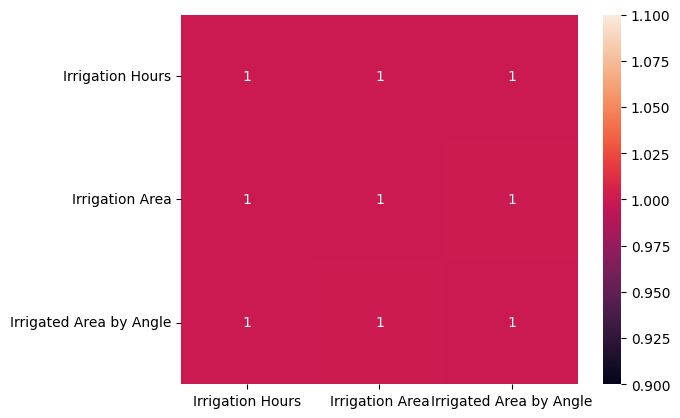

In [12]:
# Verify Correlation – Pearson
sns.heatmap(df_irrigation.corr('pearson'), annot=True)

<Axes: >

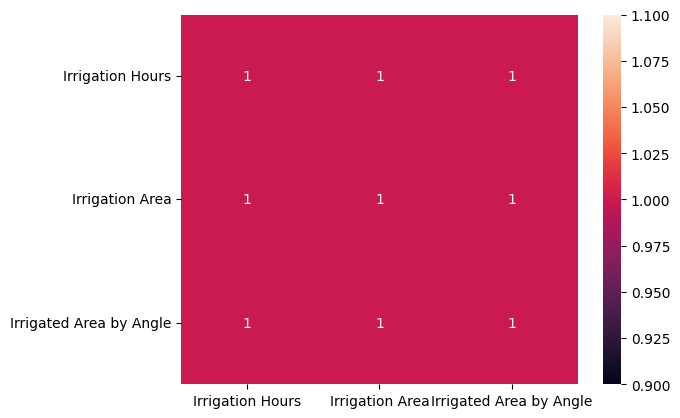

In [13]:
# Verify Correlation – Spearman
sns.heatmap(df_irrigation.corr('spearman'), annot=True)

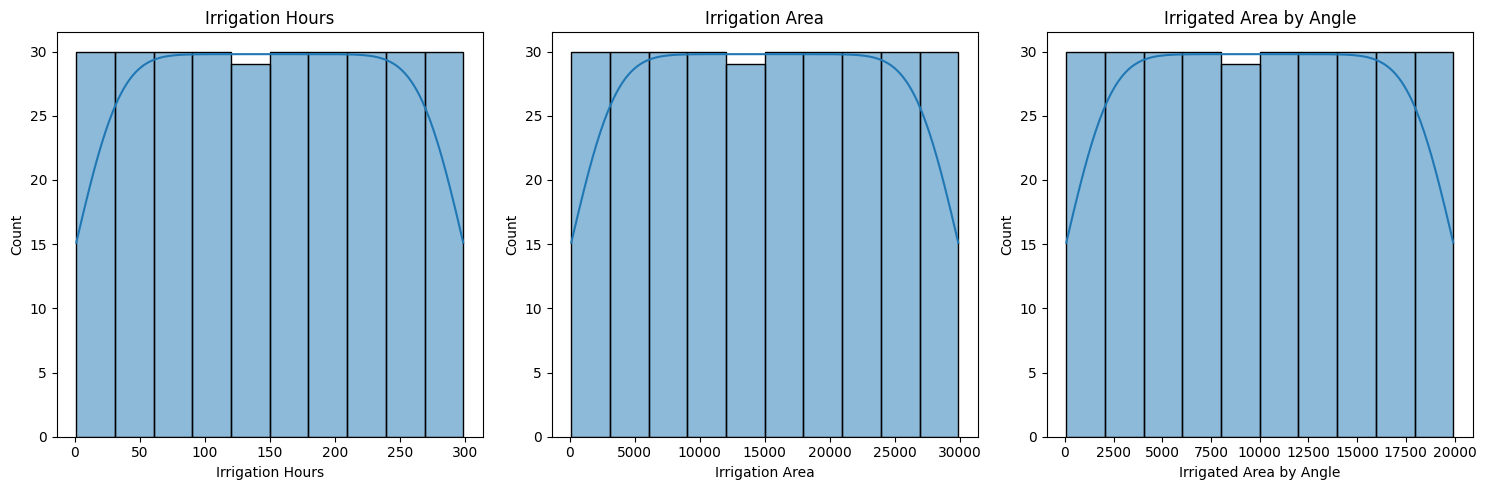

In [17]:
# Histograms

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_irrigation['Irrigation Hours'], kde=True)
plt.title('Irrigation Hours')

plt.subplot(1, 3, 2)
sns.histplot(df_irrigation['Irrigation Area'], kde=True)
plt.title('Irrigation Area')

plt.subplot(1, 3, 3)
sns.histplot(df_irrigation['Irrigated Area by Angle'], kde=True)
plt.title('Irrigated Area by Angle')

plt.tight_layout()
plt.show()